# WeatherPy


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
# !pip install citipy

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# weather_api_key

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


597

In [3]:
# cities

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
cities_df=pd.DataFrame(cities)
cities_df.columns=['City']
cities_df.head(5)

,City
0,talnakh
1,bluff
2,cape town
3,sao joao da barra
4,dillingen


In [5]:
# Add columns for lat, lng, airport name, airport address, airport rating
# Note that we used "" to specify initial entry.
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,,,,,,,,
1,bluff,,,,,,,,
2,cape town,,,,,,,,
3,sao joao da barra,,,,,,,,
4,dillingen,,,,,,,,


In [41]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "Imperial"
city='cape town'
# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

response = requests.get(query_url + city).json()
print(json.dumps(response, indent=4, sort_keys=True))
lat= response["clouds"]['all']
lat

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": -33.9258,
        "lon": 18.4232
    },
    "dt": 1611427751,
    "id": 3369157,
    "main": {
        "feels_like": 64.53,
        "humidity": 88,
        "pressure": 1013,
        "temp": 66.13,
        "temp_max": 69.01,
        "temp_min": 64
    },
    "name": "Cape Town",
    "rain": {
        "1h": 0.25
    },
    "sys": {
        "country": "ZA",
        "id": 1899,
        "sunrise": 1611374328,
        "sunset": 1611424632,
        "type": 1
    },
    "timezone": 7200,
    "visibility": 6000,
    "weather": [
        {
            "description": "light rain",
            "icon": "10n",
            "id": 500,
            "main": "Rain"
        }
    ],
    "wind": {
        "deg": 180,
        "speed": 10.36
    }
}


75

In [42]:
for index, row in cities_df.iterrows():
    query_url = f"{url}appid={weather_api_key}&units={units}&q="
    city=row["City"]
   
      # make request
    response = requests.get(query_url + city).json()
    
    try:           
        cities_df.loc[index, "Lat"] = response["coord"]["lat"]
        cities_df.loc[index, "Lng"] = response["coord"]["lon"]
        cities_df.loc[index, "Max Temp"]= response["main"]["temp_max"]
        cities_df.loc[index, "Humidity"] = response["main"]["humidity"]
        cities_df.loc[index, "Cloudiness"] = response["clouds"]["all"]
        cities_df.loc[index, "Wind Speed"] = response["wind"]["speed"]
        cities_df.loc[index, "Country"] = response["sys"]["country"]
        cities_df.loc[index, "Date"] = response["dt"]
        print(f'Processing Record {index} of Set 1 | {city}')
    except (KeyError, IndexError):
        print("Missing field/result... skipping.")
# Visualize to confirm lat lng appear
cities_df.head()

Processing Record 0 of Set 1 | talnakh
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | cape town
Processing Record 3 of Set 1 | sao joao da barra
Processing Record 4 of Set 1 | dillingen
Missing field/result... skipping.
Processing Record 6 of Set 1 | pokrovskoye
Processing Record 7 of Set 1 | saint-pierre
Processing Record 8 of Set 1 | lavrentiya
Processing Record 9 of Set 1 | jamestown
Processing Record 10 of Set 1 | touros
Processing Record 11 of Set 1 | lichtenburg
Missing field/result... skipping.
Processing Record 13 of Set 1 | fortuna
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | albany
Processing Record 16 of Set 1 | mantua
Processing Record 17 of Set 1 | hilo
Processing Record 18 of Set 1 | dikson
Processing Record 19 of Set 1 | rikitea
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Set 1 | busselton
Missing field/result... skipping.
Processing Record 24 of Set 1

Processing Record 200 of Set 1 | bathsheba
Processing Record 201 of Set 1 | broome
Missing field/result... skipping.
Processing Record 203 of Set 1 | chicama
Processing Record 204 of Set 1 | ancud
Processing Record 205 of Set 1 | tessalit
Processing Record 206 of Set 1 | biu
Processing Record 207 of Set 1 | cubuk
Processing Record 208 of Set 1 | saint-joseph
Missing field/result... skipping.
Processing Record 210 of Set 1 | bilibino
Processing Record 211 of Set 1 | itaituba
Processing Record 212 of Set 1 | arman
Processing Record 213 of Set 1 | adre
Processing Record 214 of Set 1 | yellowknife
Processing Record 215 of Set 1 | walvis bay
Processing Record 216 of Set 1 | hofn
Missing field/result... skipping.
Processing Record 218 of Set 1 | san quintin
Processing Record 219 of Set 1 | makubetsu
Processing Record 220 of Set 1 | kalakamati
Processing Record 221 of Set 1 | ponta do sol
Missing field/result... skipping.
Processing Record 223 of Set 1 | khatanga
Processing Record 224 of Set 

Processing Record 399 of Set 1 | porto novo
Processing Record 400 of Set 1 | pochutla
Processing Record 401 of Set 1 | belawan
Processing Record 402 of Set 1 | butajira
Processing Record 403 of Set 1 | colombo
Processing Record 404 of Set 1 | raga
Processing Record 405 of Set 1 | caruray
Processing Record 406 of Set 1 | mandera
Processing Record 407 of Set 1 | berdigestyakh
Processing Record 408 of Set 1 | beberibe
Processing Record 409 of Set 1 | erenhot
Processing Record 410 of Set 1 | byron bay
Processing Record 411 of Set 1 | maceio
Processing Record 412 of Set 1 | lae
Processing Record 413 of Set 1 | imbituba
Processing Record 414 of Set 1 | merauke
Missing field/result... skipping.
Processing Record 416 of Set 1 | poso
Processing Record 417 of Set 1 | paamiut
Processing Record 418 of Set 1 | veshenskaya
Processing Record 419 of Set 1 | burgos
Processing Record 420 of Set 1 | santa maria
Processing Record 421 of Set 1 | rocha
Processing Record 422 of Set 1 | samut sakhon
Processin

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-35.63,66,54,0.43,RU,1611428035
1,bluff,-46.6000,168.333,52,88,95,4,NZ,1611428035
2,cape town,-33.9258,18.4232,69.01,88,75,10.36,ZA,1611427751
3,sao joao da barra,-21.6403,-41.0511,86,51,40,14.97,BR,1611427915
4,dillingen,49.3500,6.7333,39,99,100,1.01,DE,1611428036


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [43]:
cities_df.to_csv("City_data.csv")
cities_df.head(5)
# cities_df.to_numeric("Lat")

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,talnakh,69.4865,88.3972,-35.63,66,54,0.43,RU,1611428035
1,bluff,-46.6000,168.333,52,88,95,4,NZ,1611428035
2,cape town,-33.9258,18.4232,69.01,88,75,10.36,ZA,1611427751
3,sao joao da barra,-21.6403,-41.0511,86,51,40,14.97,BR,1611427915
4,dillingen,49.3500,6.7333,39,99,100,1.01,DE,1611428036


In [55]:
# df['DataFrame Column'] = pd.to_numeric(df['DataFrame Column'],errors='coerce')
cities_df['Lat']=pd.to_numeric(cities_df['Lat'],errors='coerce')
cities_df['Lng']=pd.to_numeric(cities_df['Lng'],errors='coerce')
cities_df['Max Temp']=pd.to_numeric(cities_df['Max Temp'],errors='coerce')
cities_df['Humidity']=pd.to_numeric(cities_df['Humidity'],errors='coerce')
cities_df['Cloudiness']=pd.to_numeric(cities_df['Cloudiness'],errors='coerce')
cities_df['Wind Speed']=pd.to_numeric(cities_df['Wind Speed'],errors='coerce')
cities_df['Date']=pd.to_numeric(cities_df['Date'],errors='coerce')
cities_df.dtypes

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date          float64
dtype: object

In [56]:
cities_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.887608,13.795571,51.628401,72.637868,57.803309,8.519357,1.611428e+09
std,32.729542,88.462034,32.697062,20.846173,39.175432,5.943902,8.036179e+01
min,-54.800000,-175.200000,-54.900000,10.000000,0.000000,0.430000,1.611428e+09
25%,-8.467250,-63.262450,32.702500,63.000000,19.250000,4.535000,1.611428e+09
50%,18.709300,18.983900,62.600000,78.000000,75.000000,7.205000,1.611428e+09
75%,46.937700,82.845850,78.037500,88.000000,96.250000,11.485000,1.611428e+09
max,78.218600,178.416700,104.110000,100.000000,100.000000,35.410000,1.611428e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [57]:
#  Get the indices of cities that have humidity over 100%.
index_names = cities_df[(cities_df['Humidity'] > 100)].index
index_names

Int64Index([], dtype='int64')

In [58]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
cities_clean=cities_df.drop(index_names, inplace = False)
cities_clean.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,18.887608,13.795571,51.628401,72.637868,57.803309,8.519357,1.611428e+09
std,32.729542,88.462034,32.697062,20.846173,39.175432,5.943902,8.036179e+01
min,-54.800000,-175.200000,-54.900000,10.000000,0.000000,0.430000,1.611428e+09
25%,-8.467250,-63.262450,32.702500,63.000000,19.250000,4.535000,1.611428e+09
50%,18.709300,18.983900,62.600000,78.000000,75.000000,7.205000,1.611428e+09
75%,46.937700,82.845850,78.037500,88.000000,96.250000,11.485000,1.611428e+09
max,78.218600,178.416700,104.110000,100.000000,100.000000,35.410000,1.611428e+09


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

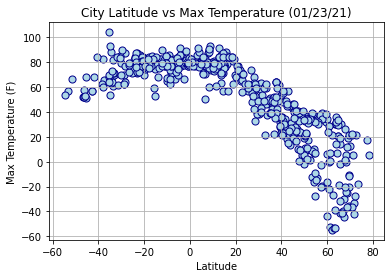

In [75]:
chart1 = cities_clean.plot.scatter(x='Lat',
                      y='Max Temp',
                      c='LightBlue',edgecolors='DarkBlue', s=50)

plt.title("City Latitude vs Max Temperature (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.savefig('Figure 1.png')

## Latitude vs. Humidity Plot

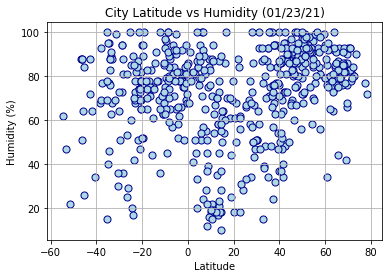

In [76]:
chart2 = cities_clean.plot.scatter(x='Lat',
                      y='Humidity',
                      c='LightBlue',edgecolors='DarkBlue', s=50)

plt.title("City Latitude vs Humidity (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.savefig('Figure 2.png')

## Latitude vs. Cloudiness Plot

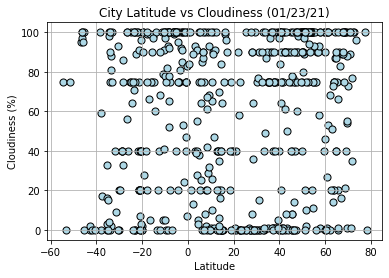

In [77]:
chart3 = cities_clean.plot.scatter(x='Lat',
                      y='Cloudiness',
                      c='LightBlue',edgecolors='black', s=50)

plt.title("City Latitude vs Cloudiness (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.savefig('Figure 3.png')

## Latitude vs. Wind Speed Plot

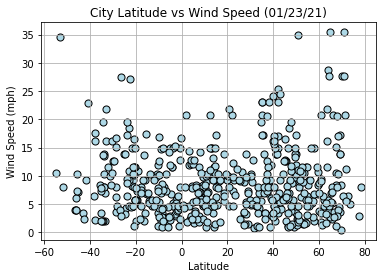

In [78]:
chart4 = cities_clean.plot.scatter(x='Lat',
                      y='Wind Speed',
                      c='LightBlue',edgecolors='black', s=50)

plt.title("City Latitude vs Wind Speed (01/23/21)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.savefig('Figure 4.png')

## Linear Regression

In [83]:
NorthData = cities_clean[cities_clean['Lat'] > 0] 
SouthData = cities_clean[cities_clean['Lat'] < 0] 
# Equator=cities_clean[cities_clean['Lat'] == 0] 
# Equator

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7511217648973587


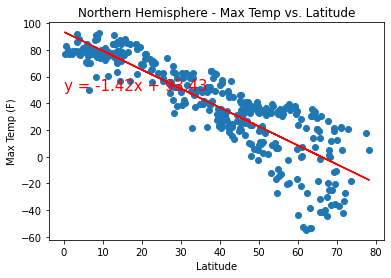

In [89]:
x_values = NorthData['Lat']
y_values = NorthData['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.24150671222063286


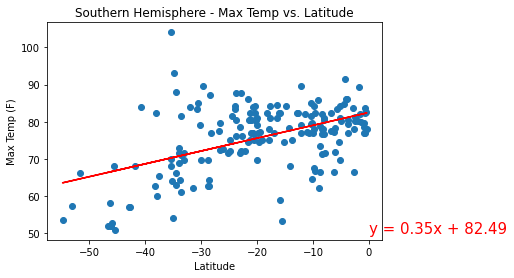

In [90]:
x_values = SouthData['Lat']
y_values = SouthData['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Max Temp vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.18104281256318372


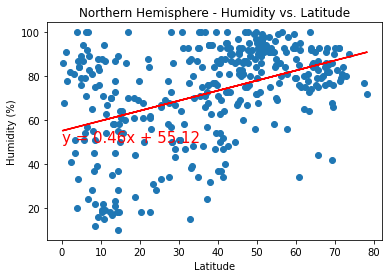

In [96]:
x_values = NorthData['Lat']
y_values = NorthData['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.04385888475428384


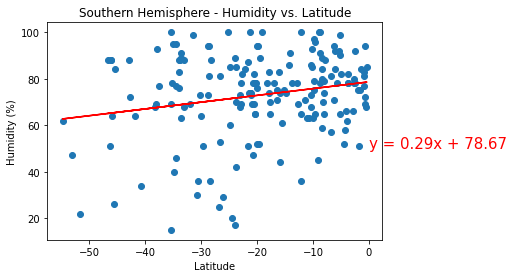

In [94]:
x_values = SouthData['Lat']
y_values = SouthData['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05454173529854916


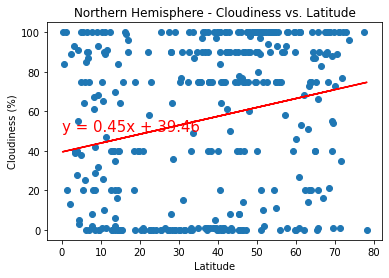

In [97]:
x_values = NorthData['Lat']
y_values = NorthData['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.06344313892381938


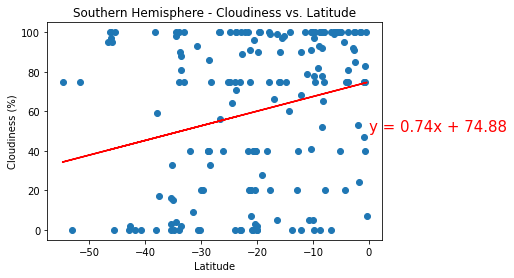

In [98]:
x_values = SouthData['Lat']
y_values = SouthData['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Cloudiness vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.012718838968693308


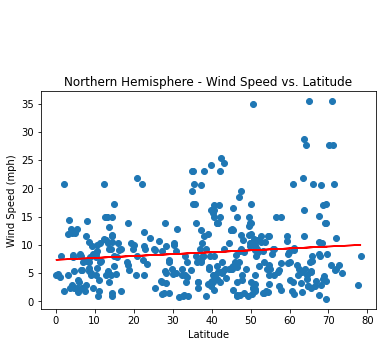

In [99]:
x_values = NorthData['Lat']
y_values = NorthData['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Northern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.046444737323559464


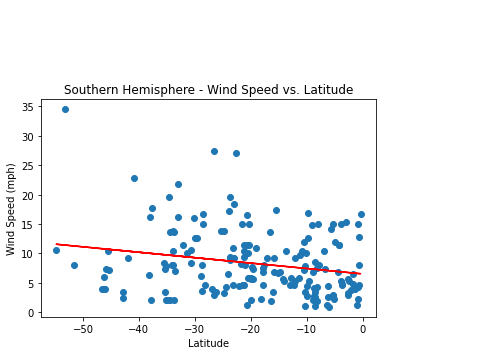

In [100]:
x_values = SouthData['Lat']
y_values = SouthData['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")

plt.title("Southern Hemisphere - Wind Speed vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
print(f"The r-squared is: {rvalue**2}")
# print(f'The linear model equation is: {line_eq}')
plt.show()